In [19]:
## importing standared set of libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
import seaborn as sns
## end of importing

## reading csv file
carData = pd.read_csv("carData.csv");

# dataset type
carData.head(5)
carData.shape
#carData.info()

# check for null values
carData.isnull().sum()

plt.figure(figsize=(20, 20))

# check of outliers for numerical values and removing them
#carData.boxplot()


# correlation establishment of numerical data
plt.figure(figsize=(20, 20))
correlationFactors = carData.corr()
#sns.heatmap(correlationFactors, annot=True)

## till now we made one-to-one relation
## to the numerical data values

filtercorrelation = correlationFactors['price']
filtercorrelation.sort_values()

# treating categorical values
carData['fueltype'] = carData['fueltype'].map({'gas':1,'diesel':2})
carData['aspiration'] = carData['aspiration'].map({'std':1, 'turbo':2})
carData['doornumber'] = carData['doornumber'].map({'two':1, 'four':2})
carData['carbody'] = carData['carbody'].map({'convertible':1, 'hatchback':2, 'sedan':3, 'wagon': 4, 'hardtop':5})
carData['drivewheel'] = carData['drivewheel'].map({'rwd':1, 'fwd':2, '4wd':3})
carData['enginelocation'] = carData['enginelocation'].map({'front':1, 'rear':2})
carData['cylindernumber'] = carData['cylindernumber'].map({'four':4, 'six':6, 'five':5, 'three':3, 'twelve':12, 'two':2, 'eight':8})

################# removing outliers
for i in range(0, 1):
    a = carData['price'].describe()
    iqr = a["75%"] - a["25%"] 
    upper= a["75%"] + 1.5 * iqr
    lower= a["25%"] - 1.5 * iqr
    output_dataset = carData[carData['price']<=upper]
    output_dataset = output_dataset[output_dataset['price']>=lower]
    carData = output_dataset
#################
print("new box plot")
#carData.boxplot()
## seperating training and testing data

new box plot


<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

training data ratio
0.7
testing data ratio
0.3
ybar y regression
0.7644857604074383


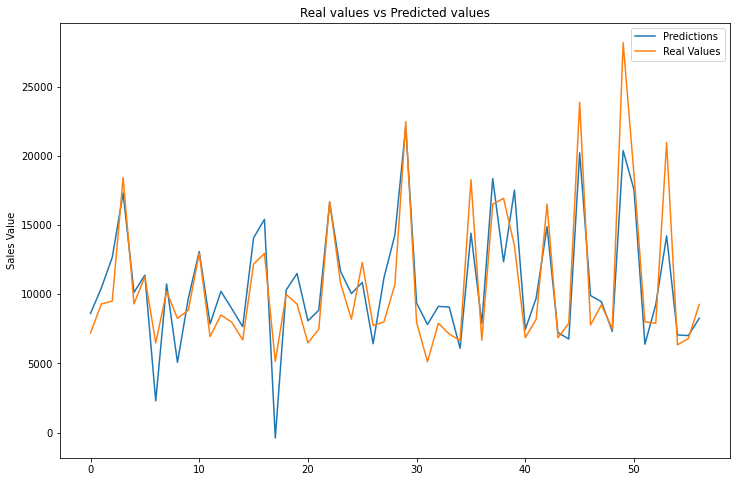

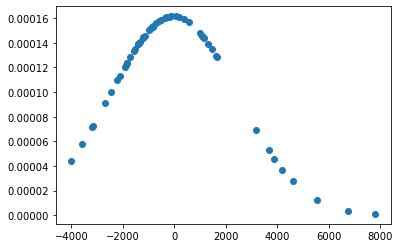

In [20]:
from sklearn.model_selection import train_test_split
x = carData[['symboling', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight',
       'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']]

y = carData['price']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=55)
# selected dataset ratio
print("training data ratio")
print(len(x_train)/len(carData))
print("testing data ratio")
print(len(x_test)/len(carData))

from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train,y_train)
prediction_lr = lr.predict(x_test)

print("ybar y regression")
print(r2_score(y_test, prediction_lr))

resultado = lr.predict(x_test)
dy = []
for i in range(y_test.values.size):
    dy.append(y_test.values[i] - resultado[i])

plt.figure(figsize=(12,8))
plt.title('Real values vs Predicted values')
plt.ylabel('Sales Value')
plt.plot(resultado) #x_test
plt.plot(y_test.values)
plt.legend(['Predictions', 'Real Values'])
plt.show()
mean = statistics.mean(dy)
sd = statistics.stdev(dy)

plt.scatter(dy, norm.pdf(dy, mean, sd))

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_VIF(X_train):
 # A dataframe that will contain the names of all the feature variables and their respective VIFs 
    vif = pd.DataFrame() 
    vif['Features'] = X_train.columns 
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])] 
    #vif['VIF'] = (vif['VIF'], 2) 
    vif = vif.sort_values(by = "VIF", ascending = False) 
    return (vif) 
vif_ = pd.DataFrame(get_VIF(x_train))
vif_

,Features,VIF
6,enginelocation,6690.937327
1,fueltype,94.270342
16,compressionratio,86.074439
19,citympg,27.830325
20,highwaympg,25.257901
13,enginesize,21.746983
11,curbweight,14.704145
17,horsepower,10.427561
7,wheelbase,9.613143
8,carlength,8.605584


C:\Users\sharma\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


ybar y regression
0.7667933952319012


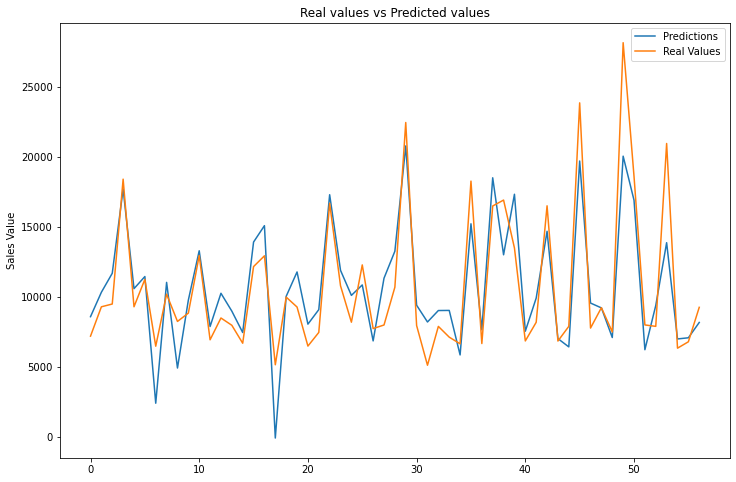

,Features,VIF
7,carwidth,4247.913850
5,wheelbase,3072.518811
6,carlength,2076.226268
8,carheight,1229.295705
18,highwaympg,654.278371
12,boreratio,593.030228
17,citympg,517.888712
9,curbweight,475.608426
11,enginesize,381.349890
16,peakrpm,286.717838


In [22]:
x.drop(['enginelocation', 'fueltype'], axis = 1, inplace = True);
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=55)
lr.fit(x_train,y_train)
prediction_lr = lr.predict(x_test)
print("ybar y regression")
print(r2_score(y_test, prediction_lr))
resultado = lr.predict(x_test)
dy = []
for i in range(y_test.values.size):
    dy.append(y_test.values[i] - resultado[i])

plt.figure(figsize=(12,8))
plt.title('Real values vs Predicted values')
plt.ylabel('Sales Value')
plt.plot(resultado) #x_test
plt.plot(y_test.values)
plt.legend(['Predictions', 'Real Values'])
plt.show()

vif_ = pd.DataFrame(get_VIF(x_train))
vif_